In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [3]:
# Load synthetic data
data = pd.read_csv('grocery_inventory_data.csv')

# Select relevant features (e.g., 'inventory_levels', 'sales')
features = ['Inventory_Level', 'Sales']
data = data[features]


In [27]:
data.head()

,Inventory_Level,Sales
0,102.483571,0.637559
1,101.792249,1.648185
2,105.030692,1.225185
3,112.645841,1.395352
4,111.475074,0.000000


In [4]:
# Normalize data using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


for inventory prediction

In [5]:
def create_sequences(data, seq_length):
    sequences = []
    targets = []

    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length, :]
        target = data[i + seq_length, 0]  # Assuming you want to predict 'inventory_levels'

        sequences.append(sequence)
        targets.append(target)

    return np.array(sequences), np.array(targets)

# Define sequence length
seq_length = 10

# Create sequences and targets
X, y = create_sequences(data_scaled, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
np.random.seed(42)
# Define the LSTM model
model1 = Sequential()
model1.add(LSTM(50, activation='relu', input_shape=(seq_length, 2)))
model1.add(Dropout(0.2))
model1.add(Dense(1))  # Output layer

# Compile the model with MSE
model1.compile(optimizer='adam', loss='mse', metrics=['mse'])

# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


# Access training and validation MSE
train_mse1 = history1.history['mse']
val_mse1 = history1.history['val_mse']

Epoch 1/50
9/9 [==============================] - 2s 62ms/step - loss: 0.2706 - mse: 0.2706 - val_loss: 0.2635 - val_mse: 0.2635
Epoch 2/50
9/9 [==============================] - 0s 39ms/step - loss: 0.2072 - mse: 0.2072 - val_loss: 0.2000 - val_mse: 0.2000
Epoch 3/50
9/9 [==============================] - 0s 35ms/step - loss: 0.1471 - mse: 0.1471 - val_loss: 0.1264 - val_mse: 0.1264
Epoch 4/50
9/9 [==============================] - 0s 34ms/step - loss: 0.0754 - mse: 0.0754 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 5/50
9/9 [==============================] - 0s 35ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 6/50
9/9 [==============================] - 0s 32ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 7/50
9/9 [==============================] - 0s 34ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 8/50
9/9 [==============================] - 0s 40ms/step - loss: 0.0174 - mse: 0.0174 - val

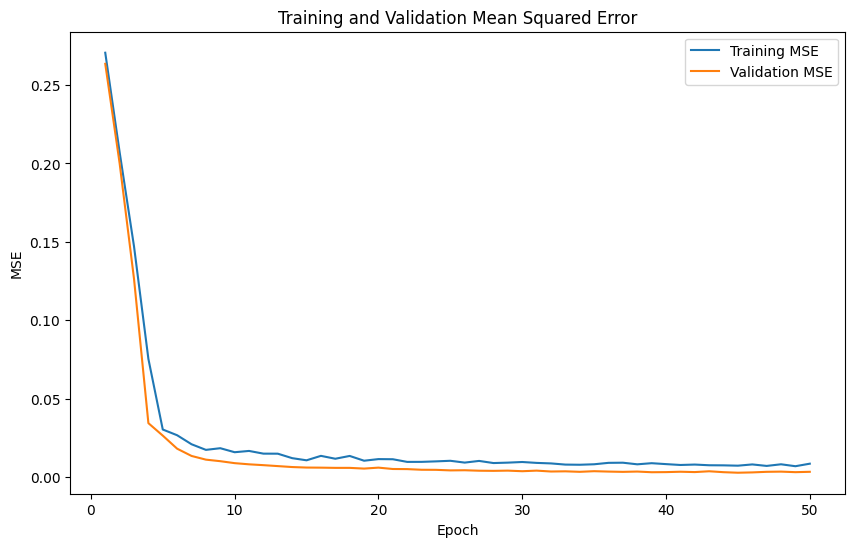

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_mse1) + 1), train_mse1, label='Training MSE')
plt.plot(range(1, len(val_mse1) + 1), val_mse1, label='Validation MSE')

plt.title('Training and Validation Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()


3/3 [==============================] - 0s 4ms/step


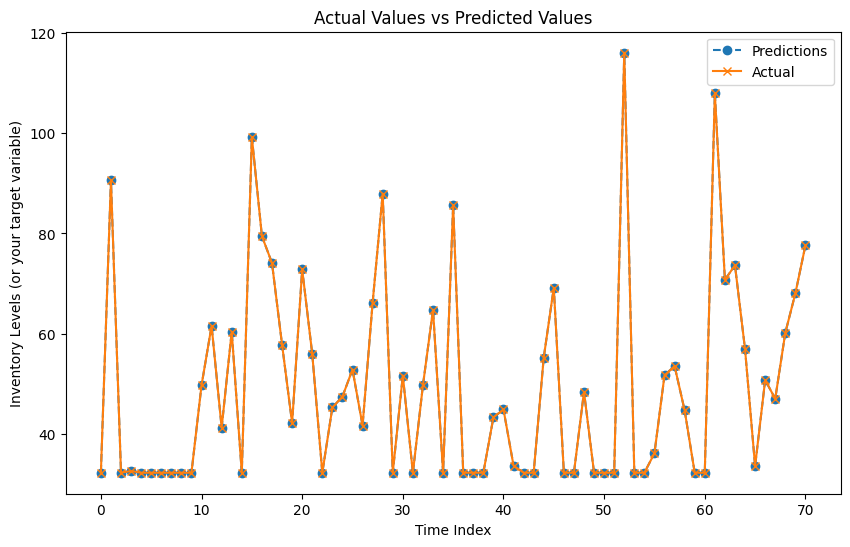

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Make predictions on the test set
y_pred = model1.predict(X_test)

# If you want to inverse transform the scaled predictions to the original scale
y_pred_original_scale = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_pred.reshape(-1, 1)), axis=1))[:, 0]

# If you want to inverse transform the scaled ground truth to the original scale
y_test_original_scale = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_test.reshape(-1, 1)), axis=1))[:, 0]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_pred_original_scale, label="Predictions", linestyle='--', marker='o')
plt.plot(y_test_original_scale, label="Actual", linestyle='-', marker='x')
plt.title('Actual Values vs Predicted Values')
plt.xlabel('Time Index')
plt.ylabel('Inventory Levels (or your target variable)')
plt.legend()
plt.show()

In [ ]:
model1.save("grocery_management")

In [34]:
input = X_test

In [41]:
np.save("input.npy", X_test)